# Anirbaan Ghatak
# C026
# Aim: Implement a three-layer feedforward neural network for the IRIS dataset, including pre-processing, backpropagation, and tuning learning rates
# and iterations to find optimal performance.

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:
data = pd.read_csv('Iris.csv')

STEP2

In [7]:
species_encoder = OneHotEncoder()
species_encoded = species_encoder.fit_transform(data[['Species']]).toarray()
species_encoded_df = pd.DataFrame(species_encoded, columns=species_encoder.get_feature_names_out(['Species']))

In [8]:
data = data.drop('Species', axis=1)
data = pd.concat([data, species_encoded_df], axis=1)

In [11]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,-0.900681,1.032057,-1.341272,-1.312977,1.0,0.0,0.0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,1.0,0.0,0.0
2,3,-1.385353,0.337848,-1.398138,-1.312977,1.0,0.0,0.0
3,4,-1.506521,0.106445,-1.284407,-1.312977,1.0,0.0,0.0
4,5,-1.021849,1.263460,-1.341272,-1.312977,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,0.0,0.0,1.0
146,147,0.553333,-1.281972,0.705893,0.922064,0.0,0.0,1.0
147,148,0.795669,-0.124958,0.819624,1.053537,0.0,0.0,1.0
148,149,0.432165,0.800654,0.933356,1.447956,0.0,0.0,1.0


In [10]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

In [14]:
X = data.drop(columns=species_encoded_df.columns)
y = species_encoded_df

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [20]:
tf.random.set_seed(42)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])


In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Epoch 1/510
4/4 - 1s - loss: 0.2328 - accuracy: 0.3524 - val_loss: 0.2333 - val_accuracy: 0.2889 - 704ms/epoch - 176ms/step
Epoch 2/510
4/4 - 0s - loss: 0.2325 - accuracy: 0.3524 - val_loss: 0.2330 - val_accuracy: 0.2889 - 26ms/epoch - 7ms/step
Epoch 3/510
4/4 - 0s - loss: 0.2322 - accuracy: 0.3524 - val_loss: 0.2327 - val_accuracy: 0.2889 - 32ms/epoch - 8ms/step
Epoch 4/510
4/4 - 0s - loss: 0.2319 - accuracy: 0.3524 - val_loss: 0.2324 - val_accuracy: 0.2889 - 32ms/epoch - 8ms/step
Epoch 5/510
4/4 - 0s - loss: 0.2316 - accuracy: 0.3524 - val_loss: 0.2321 - val_accuracy: 0.2889 - 28ms/epoch - 7ms/step
Epoch 6/510
4/4 - 0s - loss: 0.2313 - accuracy: 0.3524 - val_loss: 0.2318 - val_accuracy: 0.2889 - 40ms/epoch - 10ms/step
Epoch 7/510
4/4 - 0s - loss: 0.2310 - accuracy: 0.3524 - val_loss: 0.2316 - val_accuracy: 0.2889 - 36ms/epoch - 9ms/step
Epoch 8/510
4/4 - 0s - loss: 0.2307 - accuracy: 0.3524 - val_loss: 0.2313 - val_accuracy: 0.2889 - 48ms/epoch - 12ms/step
Epoch 9/510
4/4 - 0s - loss

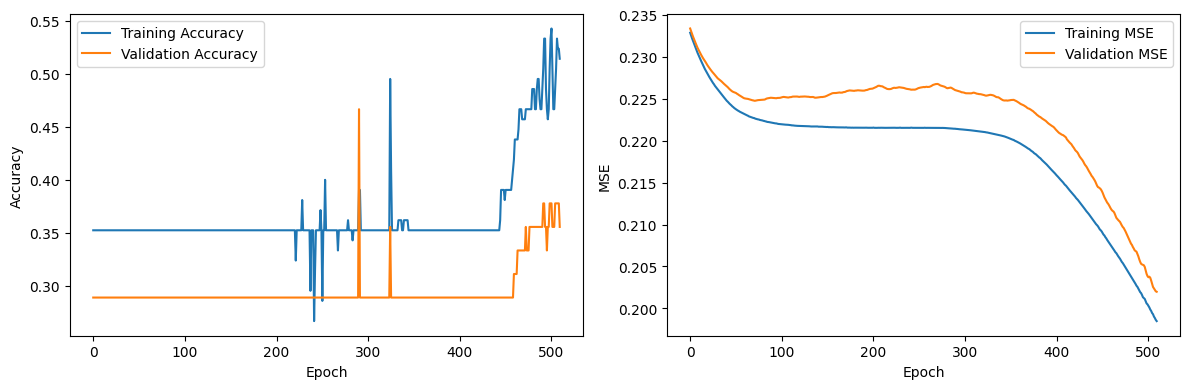

In [23]:
import matplotlib.pyplot as plt

# Visualize accuracy and MSE during training
history = model.fit(X_train, y_train, epochs=510, batch_size=32, verbose=2, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")



# Visualize accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualize MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.5143
Epoch 0/5000 - MSE: 0.19814527034759521, Accuracy: 0.5142857432365417
4/4 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9619
Epoch 100/5000 - MSE: 0.083917036652565, Accuracy: 0.961904764175415
4/4 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 200/5000 - MSE: 0.015704305842518806, Accuracy: 1.0
4/4 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 300/5000 - MSE: 0.005740058608353138, Accuracy: 1.0
4/4 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 400/5000 - MSE: 0.002987093757838011, Accuracy: 1.0
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 500/5000 - MSE: 0.0018204014049842954, Accuracy: 1.0
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 600/5000 - MSE: 0.001210539

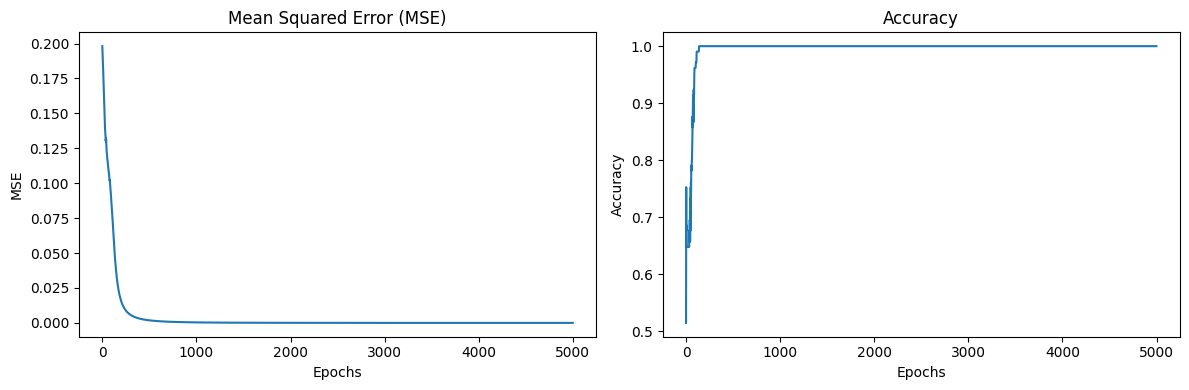

In [24]:
learning_rate = 0.01
iterations = 5000

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

mse_history = []
accuracy_history = []

for epoch in range(iterations):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

    mse_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{iterations} - MSE: {mse_history[-1]}, Accuracy: {accuracy_history[-1]}")

# Plot MSE and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_history)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [25]:
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
iterations_list = [500, 5000]
results_df = pd.DataFrame(columns=['Learning Rate', 'Iterations', 'MSE', 'Accuracy'])

# Loop through different combinations of learning rates and iterations
for learning_rate in learning_rates:
    for iterations in iterations_list:
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(2, activation='sigmoid'),
            tf.keras.layers.Dense(2, activation='sigmoid'),
            tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
        ])


        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=iterations, batch_size=32, verbose=0)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        y_true_classes = y_test.argmax(axis=1)
        y_pred_classes = y_pred.argmax(axis=1)
        accuracy = accuracy_score(y_true_classes, y_pred_classes)

        # Append the results to the DataFrame
        results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


2/2 [==============================] - 0s 2ms/step


/tmp/ipykernel_5172/3138283269.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Learning Rate': learning_rate,'Iterations': iterations,'MSE': mse,'Accuracy': accuracy }, ignore_index=True)


In [26]:
print(results_df)

    Learning Rate  Iterations       MSE  Accuracy
0            0.01       500.0  0.096548  0.711111
1            0.01      5000.0  0.096384  0.711111
2            0.10       500.0  0.096445  0.711111
3            0.10      5000.0  0.228034  0.288889
4            0.20       500.0  0.097797  0.711111
5            0.20      5000.0  0.228388  0.288889
6            0.30       500.0  0.231707  0.288889
7            0.30      5000.0  0.228055  0.288889
8            0.40       500.0  0.230209  0.288889
9            0.40      5000.0  0.226507  0.288889
10           0.50       500.0  0.229810  0.288889
11           0.50      5000.0  0.226200  0.288889
